<a href="https://colab.research.google.com/github/KUMAR-JITENDER-81/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:

from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:

!ls

data  face-mask-dataset.zip  sample_data


In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:10])
print(with_mask_files[-10:])

['with_mask_3431.jpg', 'with_mask_3188.jpg', 'with_mask_970.jpg', 'with_mask_791.jpg', 'with_mask_1840.jpg', 'with_mask_2939.jpg', 'with_mask_2958.jpg', 'with_mask_3256.jpg', 'with_mask_474.jpg', 'with_mask_1062.jpg']
['with_mask_1919.jpg', 'with_mask_1889.jpg', 'with_mask_2135.jpg', 'with_mask_1617.jpg', 'with_mask_1873.jpg', 'with_mask_281.jpg', 'with_mask_2278.jpg', 'with_mask_3301.jpg', 'with_mask_2285.jpg', 'with_mask_771.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:10])
print(without_mask_files[-10:])

['without_mask_1070.jpg', 'without_mask_3316.jpg', 'without_mask_3030.jpg', 'without_mask_3144.jpg', 'without_mask_1773.jpg', 'without_mask_1585.jpg', 'without_mask_713.jpg', 'without_mask_3248.jpg', 'without_mask_272.jpg', 'without_mask_3536.jpg']
['without_mask_308.jpg', 'without_mask_1402.jpg', 'without_mask_1688.jpg', 'without_mask_2274.jpg', 'without_mask_2152.jpg', 'without_mask_1309.jpg', 'without_mask_416.jpg', 'without_mask_2195.jpg', 'without_mask_2158.jpg', 'without_mask_873.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:10])

print(without_mask_labels[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

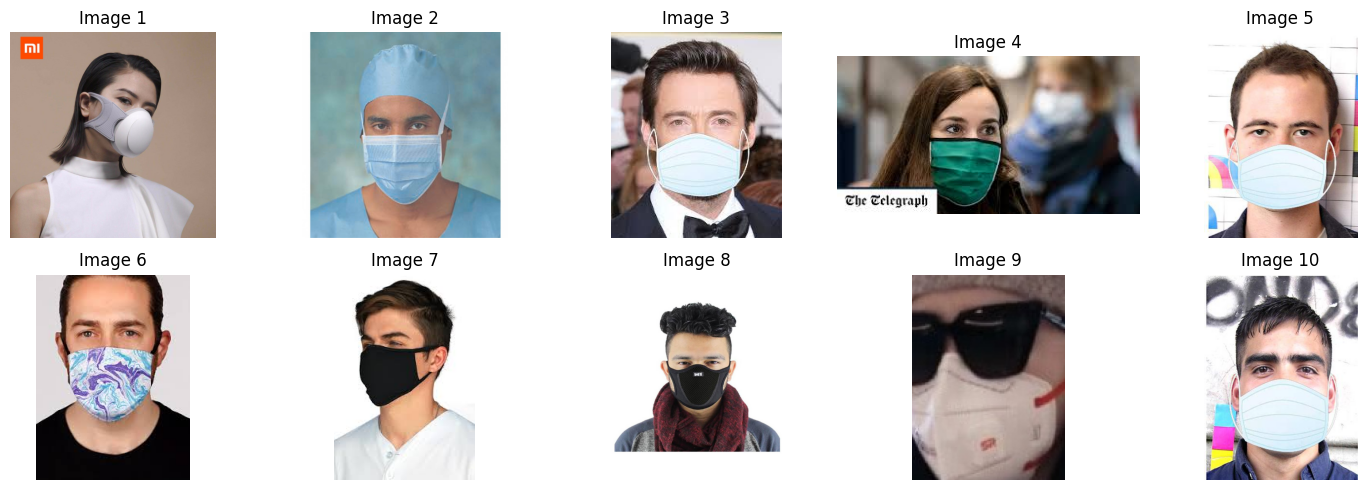

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')

plt.figure(figsize=(15, 5))
for i in range(10):
    img_path = os.path.join('/content/data/with_mask', with_mask_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

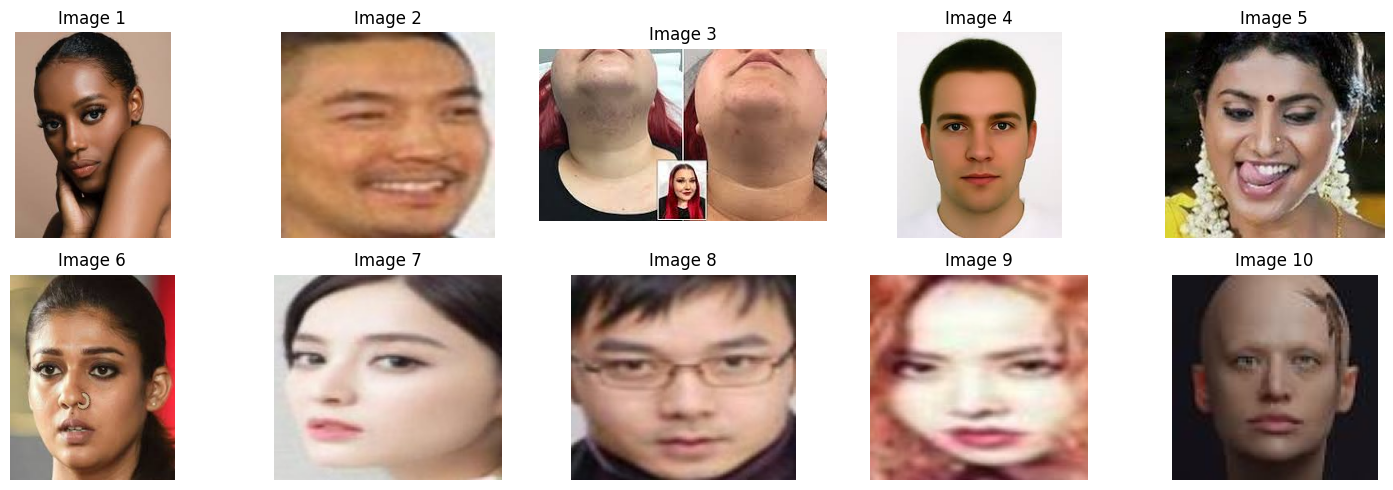

In [ ]:
with_mask_files = os.listdir('/content/data/without_mask')

plt.figure(figsize=(15, 5))
for i in range(10):
    img_path = os.path.join('/content/data/without_mask', with_mask_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/with_mask/without_mask_1070.jpg'

In [ ]:
data[0]

IndexError: list index out of range

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (3776, 128, 128, 3) (3777, 128, 128, 3)


In [ ]:

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 57,  75,  89],
        [ 47,  65,  79],
        [ 47,  63,  78],
        ...,
        [ 39,  41,  53],
        [ 41,  43,  54],
        [ 38,  41,  50]],

       [[ 55,  73,  87],
        [ 45,  63,  77],
        [ 42,  59,  74],
        ...,
        [ 37,  39,  51],
        [ 40,  42,  54],
        [ 38,  41,  50]],

       [[ 50,  68,  82],
        [ 42,  60,  74],
        [ 44,  60,  75],
        ...,
        [ 40,  42,  54],
        [ 40,  42,  53],
        [ 38,  41,  50]],

       ...,

       [[235, 234, 239],
        [235, 234, 239],
        [234, 233, 238],
        ...,
        [158, 115,  99],
        [162, 119, 103],
        [157, 114,  98]],

       [[235, 234, 239],
        [235, 234, 239],
        [234, 233, 238],
        ...,
        [157, 114,  98],
        [151, 108,  92],
        [146, 103,  87]],

       [[235, 234, 239],
        [235, 234, 239],
        [234, 233, 238],
        ...,
        [157, 114,  99],
        [153, 111,  97],
        [148, 106,  92]]], dtype=uint8)
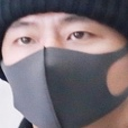

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.22352941, 0.29411765, 0.34901961],
        [0.18431373, 0.25490196, 0.30980392],
        [0.18431373, 0.24705882, 0.30588235],
        ...,
        [0.15294118, 0.16078431, 0.20784314],
        [0.16078431, 0.16862745, 0.21176471],
        [0.14901961, 0.16078431, 0.19607843]],

       [[0.21568627, 0.28627451, 0.34117647],
        [0.17647059, 0.24705882, 0.30196078],
        [0.16470588, 0.23137255, 0.29019608],
        ...,
        [0.14509804, 0.15294118, 0.2       ],
        [0.15686275, 0.16470588, 0.21176471],
        [0.14901961, 0.16078431, 0.19607843]],

       [[0.19607843, 0.26666667, 0.32156863],
        [0.16470588, 0.23529412, 0.29019608],
        [0.17254902, 0.23529412, 0.29411765],
        ...,
        [0.15686275, 0.16470588, 0.21176471],
        [0.15686275, 0.16470588, 0.20784314],
        [0.14901961, 0.16078431, 0.19607843]],

       ...,

       [[0.92156863, 0.91764706, 0.9372549 ],
        [0.92156863, 0.91764706, 0.9372549 ],
        [0.91764706, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

# num_of_classes = 2

# model = keras.Sequential()

# model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))


# model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(128,128,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - acc: 0.6728 - loss: 0.7721 - val_acc: 0.8651 - val_loss: 0.3210
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8739 - loss: 0.3234 - val_acc: 0.8889 - val_loss: 0.2883
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9047 - loss: 0.2473 - val_acc: 0.8942 - val_loss: 0.2776
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9050 - loss: 0.2384 - val_acc: 0.8942 - val_loss: 0.2667
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9333 - loss: 0.1777 - val_acc: 0.8757 - val_loss: 0.2759
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9360 - loss: 0.1681 - val_acc: 0.9074 - val_loss: 0.2534
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9488 - loss: 0.1302 - val_acc: 0.9206 - val_loss: 0.2746
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9512 - loss: 0.1208 - val_acc: 0.9074 - val_loss: 0.2845
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16m

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9182 - loss: 0.5359
Test Accuracy = 0.9216309189796448


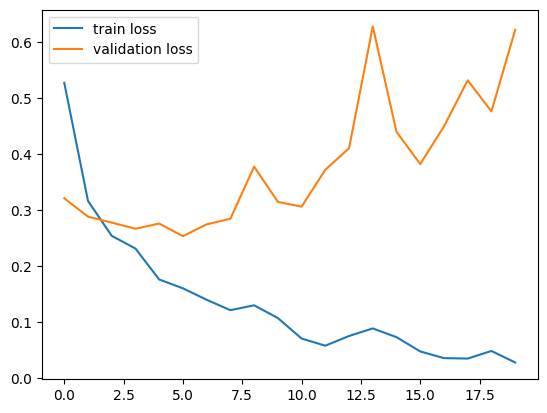

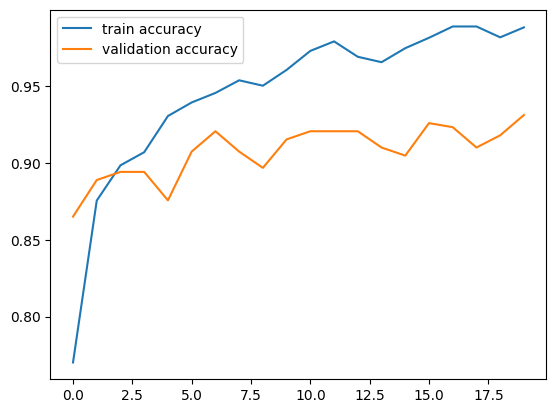

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/pexels-mastercowley-1300402.jpg


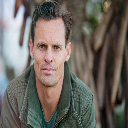

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
Raw prediction output: [[0.73923296 0.28972372]]
Predicted class: 0
Confidence (accuracy): 0.73923296
The person in the image is not wearing a mask


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    input_image_resized = cv2.resize(input_image, (128, 128))

    cv2_imshow(input_image_resized)

    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("Raw prediction output:", input_prediction)
    print("Predicted class:", input_pred_label)
    print("Confidence (accuracy):", np.max(input_prediction))

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/gayatri-malhotra-EJWaKVPB6iI-unsplash.jpg


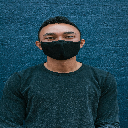

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw prediction output: [[0.44919235 0.5967403 ]]
Predicted class: 1
Confidence (accuracy): 0.5967403
The person in the image is wearing a mask


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    input_image_resized = cv2.resize(input_image, (128, 128))

    cv2_imshow(input_image_resized)

    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("Raw prediction output:", input_prediction)
    print("Predicted class:", input_pred_label)
    print("Confidence (accuracy):", np.max(input_prediction))

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/Akshay Kumar Turns Down Mrighdeep Singh Lamba’s High-Concept Comedy Over Snake-Related Theme.jpeg


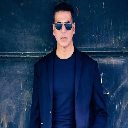

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction output: [[0.89705396 0.03193844]]
Predicted class: 0
Confidence (accuracy): 0.89705396
The person in the image is not wearing a mask


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    input_image_resized = cv2.resize(input_image, (128, 128))

    cv2_imshow(input_image_resized)

    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("Raw prediction output:", input_prediction)
    print("Predicted class:", input_pred_label)
    print("Confidence (accuracy):", np.max(input_prediction))

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/pavel-anoshin-IxW2erjGO7U-unsplash.jpg


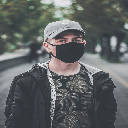

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Raw prediction output: [[0.14491314 0.96474886]]
Predicted class: 1
Confidence (accuracy): 0.96474886
The person in the image is wearing a mask


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    input_image_resized = cv2.resize(input_image, (128, 128))

    cv2_imshow(input_image_resized)

    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("Raw prediction output:", input_prediction)
    print("Predicted class:", input_pred_label)
    print("Confidence (accuracy):", np.max(input_prediction))

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


Path of the image to be predicted: /content/jitu.jpg


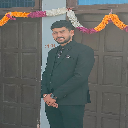

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction output: [[0.93070036 0.04704461]]
Predicted class: 0
Confidence (accuracy): 0.93070036
The person in the image is not wearing a mask


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    input_image_resized = cv2.resize(input_image, (128, 128))

    cv2_imshow(input_image_resized)

    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("Raw prediction output:", input_prediction)
    print("Predicted class:", input_pred_label)
    print("Confidence (accuracy):", np.max(input_prediction))

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')
